# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Carregue os dados da tarefa anterior

In [21]:
from pandas_datareader import data as web
import plotly.express as px 
from plotly import graph_objects
import yfinance as yf
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import mplfinance as mpf

import pandas as pd
import numpy as np

yf.pdr_override()
ativos = ["^BVSP", "ITUB3.SA","PETR4.SA"]
start_date = "2022-01-01"
end_date = "2023-01-01"

# Obter dados do Yahoo Finance usando pandas_datareader
data = web.get_data_yahoo(ativos, start=start_date, end=end_date)

# Exibir os dados
print(data)

[*********************100%%**********************]  3 of 3 completed
            Adj Close                           Close                        
             ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-01-03  17.706394  13.173102  103922.0  19.379999  29.090000  103922.0  \
2022-01-04  18.099260  13.222913  103514.0  19.809999  29.200001  103514.0   
2022-01-05  17.733801  12.711205  101006.0  19.410000  28.070000  101006.0   
2022-01-06  18.053576  12.702148  101561.0  19.760000  28.049999  101561.0   
2022-01-07  18.336811  12.761017  102719.0  20.070000  28.180000  102719.0   
...               ...        ...       ...        ...        ...       ...   
2022-12-23  20.916761  19.464846  109698.0  21.860001  25.120001  109698.0   
2022-12-26  20.648846  19.325369  108738.0  21.580000  24.940001  108738.0   
2022-12-27  20.457470  19.457096  108347.0  21.379999  25.110001  108347.

In [6]:
import yfinance as yf
import pandas as pd

# Lista de ativos
ativos = ["^BVSP", "ITUB3.SA", "PETR4.SA"]

# Baixar dados do Yahoo Finance
dados = yf.download(ativos, start="2022-01-01", end="2023-01-01")
fechamento = data["Adj Close"]

# Salvar os dados em um arquivo CSV
dados.to_csv("dados_ativos_yahoo.csv")

# Exibir os primeiros registros dos dados
print(dados.head())

[*********************100%%**********************]  3 of 3 completed
            Adj Close                           Close                        
             ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-01-03  17.706394  13.173102  103922.0  19.379999  29.090000  103922.0  \
2022-01-04  18.099260  13.222913  103514.0  19.809999  29.200001  103514.0   
2022-01-05  17.733801  12.711205  101006.0  19.410000  28.070000  101006.0   
2022-01-06  18.053576  12.702148  101561.0  19.760000  28.049999  101561.0   
2022-01-07  18.336811  12.761017  102719.0  20.070000  28.180000  102719.0   

                 High                             Low                        
             ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-01-03  19.680000  29.219999  106125.0  19.040001  28.530001  103413

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [7]:
# Calcular o desvio padrão de 90 dias
desvio_padrao_90 = fechamento.rolling(window=90).std()

In [13]:
media_movel_90 = fechamento.rolling(window=90).mean()

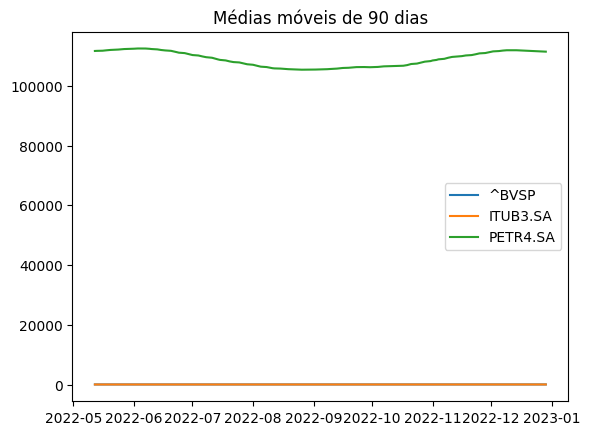

In [15]:
# Plotar as médias móveis
plt.plot(media_movel_90)

# Adicionar legendas
plt.legend(["^BVSP", "ITUB3.SA", "PETR4.SA"])

# Adicionar título
plt.title("Médias móveis de 90 dias")

# Exibir o gráfico
plt.show()

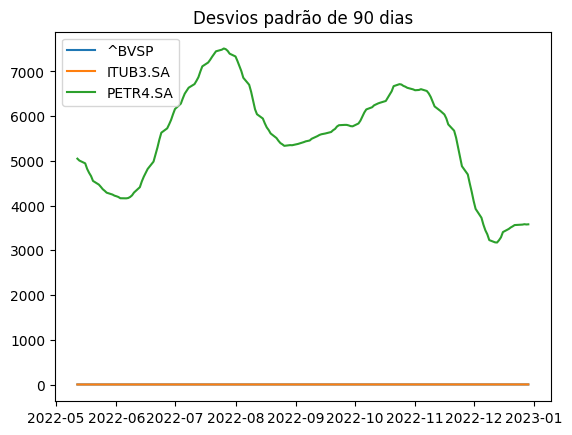

In [16]:
# Plotar os desvios padrão
plt.plot(desvio_padrao_90)

# Adicionar legendas
plt.legend(["^BVSP", "ITUB3.SA", "PETR4.SA"])

# Adicionar título
plt.title("Desvios padrão de 90 dias")

# Exibir o gráfico
plt.show()

Ao comparar os dois gráficos, podemos observar que eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade dos ativos. Em todos os três casos, os períodos de maior volatilidade coincidem com os períodos de maior variação nos preços dos ativos.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

[*********************100%%**********************]  1 of 1 completed


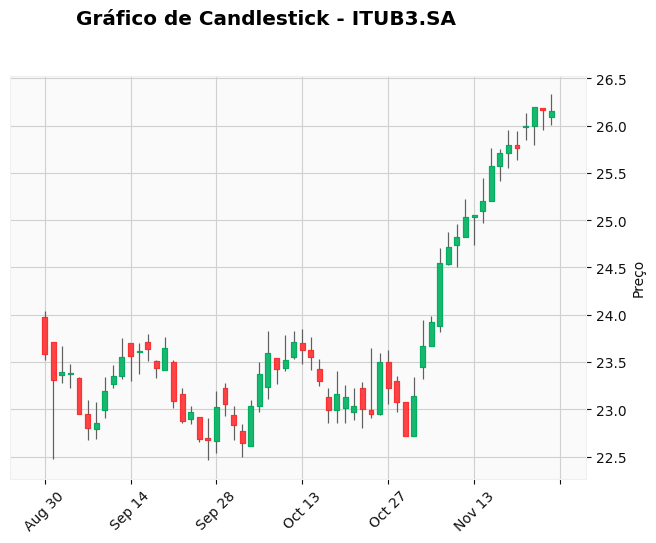

In [25]:

ticker = 'ITUB3.SA'  
data = yf.download(ticker, period='60d', interval='1d') 

# Criar gráfico de candlestick
mpf.plot(data, type='candle', title=f'Gráfico de Candlestick - {ticker}', ylabel='Preço', style='yahoo')
